In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import statistics as stat

In [2]:
#Loading the data
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [3]:
#Store the data
df = pd.read_csv('framingham.csv').dropna()

In [4]:
#Check number of Rows and Attributes after dropping null characters
df.shape

(3656, 16)

In [5]:
#print correlation
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


In [6]:
#drop Education
X = df[['totChol','age','currentSmoker', 'cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
y = df.TenYearCHD

In [7]:
#Balance the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [8]:
#implementing with scikit learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='rbf')
model.fit(X, y)
y_pred_svm = model.predict(X_test)
print('Accuracy Score for SVM Classification: ',accuracy_score(y_test,y_pred_svm))
print("Train Accuracy: {}".format(accuracy_score(y_train, model.predict(X_train))))

Accuracy Score for SVM Classification:  0.8469945355191257
Train Accuracy: 0.8488372093023255


In [9]:
#SVM_Algorithm

class SVM2:

	def __init__(self, lr = 1e-4, regularization = 1.0, n_iter = 2000):
   
 
		self.n_features = int
		self.n_samples = int
		self.w = np.array 
		self.y = np.array 
		self.X = np.array

		self.lr = lr 	# Learning rate for gradient descent
		self.regularization = regularization 	# Regularization parameter, to avoid misclassifying
		self.n_iter = n_iter	# Maximum Number of iterations to run

	def fit(self, X, y):

		self.n_samples = X.shape[0]
		self.n_features = X.shape[1]
		self.X = np.append(X, np.ones(self.n_samples).reshape(-1, 1), axis = 1)   #Adding the intercept term column "b" with 1s
		self.y = np.where(y == 0, -1, 1)
		self.w = np.zeros(self.n_features + 1) # add +1 for the intercept
    
		# weight optimization

		for i in range(self.n_iter):
			""" Cost Function: l(w) = sum(max(0, 1 - y(wX + b))) + (lambda/2)(||w||)^2 """
			
			y_pred = (self.w * self.X).sum(axis = 1) # y = wX+b
            
			distance = (1 - (self.y * y_pred))
			distance[distance < 0] = 0
			hingeLoss = np.sum(distance)/self.n_samples
			cost = hingeLoss  + (1/2) * self.regularization * (np.dot(self.w, self.w))

			lambda_w =  self.regularization * (self.w)
			zipped = zip(self.y, y_pred, self.X)

			for y, yt, X in zipped:

				if y*yt < 1:
					lambda_w -= y*X

			lambda_w =lambda_w/self.n_samples
			self.w = self.w - (self.lr * lambda_w)

	def predict(self, X):

		num_samples = X.shape[0]
		X = np.append(X, np.ones(num_samples).reshape(-1, 1), axis = 1)

		y_pred = np.sign((self.w * X).sum(axis = 1))

		y_pred[np.where(y_pred == -1)] = 0.0

		return y_pred

In [10]:
# Test SVM_Method2
clf = SVM2()

clf.fit(X_train, y_train)

In [11]:
#Accuracy measures
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

def accuracy_score(y_true, y_pred):

	"""	score = (y_true - y_pred) / len(y_true) """

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)
 
print("Train Accuracy: {}".format(accuracy_score(y_train, clf.predict(X_train))))
print("Test Accuracy: {}".format(accuracy_score(y_test, clf.predict(X_test))))

Train Accuracy: 84.82
Test Accuracy: 84.56


In [12]:
# Implement stratified 10-Fold cross validation

from sklearn.model_selection import StratifiedKFold
#creating accuracy list
accur=[]
strat_kfold= StratifiedKFold(n_splits=10,random_state=None)
strat_kfold.get_n_splits(X_train,y_train)
for train_index, test_index in strat_kfold.split(X_train,y_train):
    X1_train,X1_test=X_train.iloc[train_index],X_train.iloc[test_index]
    y1_train,y1_test=y_train.iloc[train_index],y_train.iloc[test_index]

    clf.fit(X1_train, y1_train)
    prediction=clf.predict(X1_test)
    score=accuracy_score(y1_test, prediction)
    accur.append(score)
print('Custom Kfold Accuracy:',accur)
print('Mean:', stat.mean(accur))
print('stdev:', stat.stdev(accur))

Custom Kfold Accuracy: [81.91, 84.64, 84.64, 84.3, 72.26, 84.93, 84.93, 84.93, 84.93, 84.93]
Mean: 83.24000000000001
stdev: 3.9672744632387946


In [13]:
prediction = clf.predict(X_test)

In [14]:
#Confusion matrix
import warnings
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

warnings.filterwarnings('ignore')
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, prediction, labels=[0,1]))
print("\nClassification Report:")
print(metrics.classification_report(y_test, prediction, labels=[0,1]))

print('Precision=',precision_score(y_test, prediction)*100)
print("F1-Score", f1_score(y_test, prediction, average=None))
print("Recall", recall_score(y_test, prediction, average=None))


Confusion Matrix:
[[619   0]
 [113   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       619
           1       0.00      0.00      0.00       113

    accuracy                           0.85       732
   macro avg       0.42      0.50      0.46       732
weighted avg       0.72      0.85      0.77       732

Precision= 0.0
F1-Score [0.91635825 0.        ]
Recall [1. 0.]


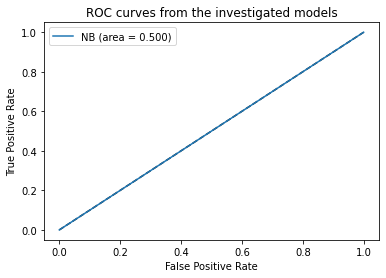

In [15]:
#Plotting
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, prediction)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, prediction)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()